<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/main/driveway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
image=cv2.imread('/content/road.png')

In [2]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

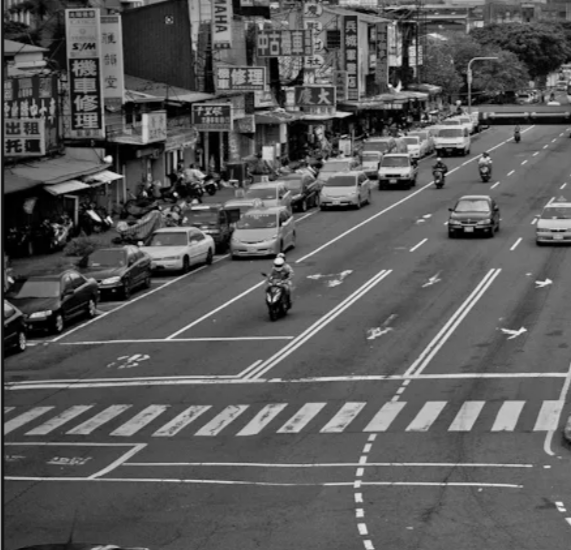

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray_img)

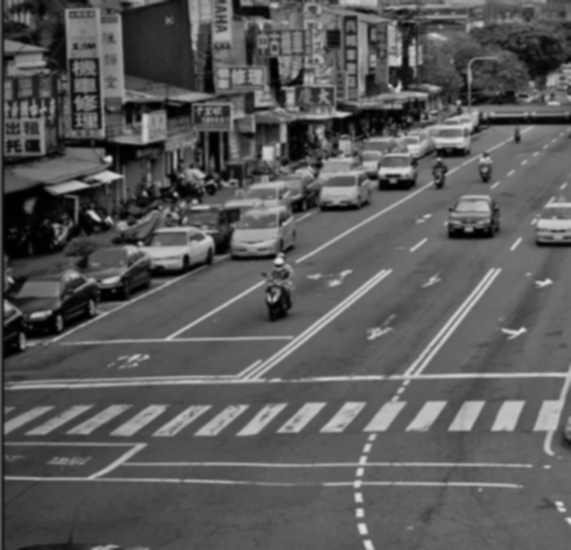

In [9]:

kernel_size = (5, 5)  # 高斯和大小 通常奇數
sigma_x = 0  # X方向上的標準差，0 表示根據核大小自動計算
# 高斯濾波器
blurred_img = cv2.GaussianBlur(gray_img, kernel_size, sigma_x)
cv2_imshow(blurred_img)

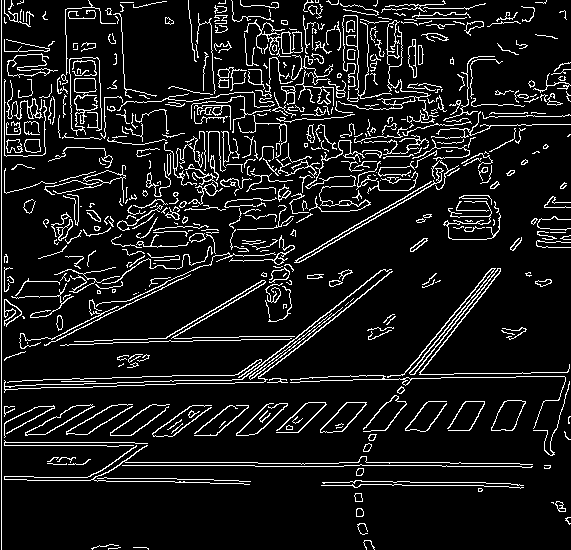

In [13]:
# 使用 Canny 邊緣檢測
edges = cv2.Canny(blurred_img, 100, 180)
cv2_imshow(edges)

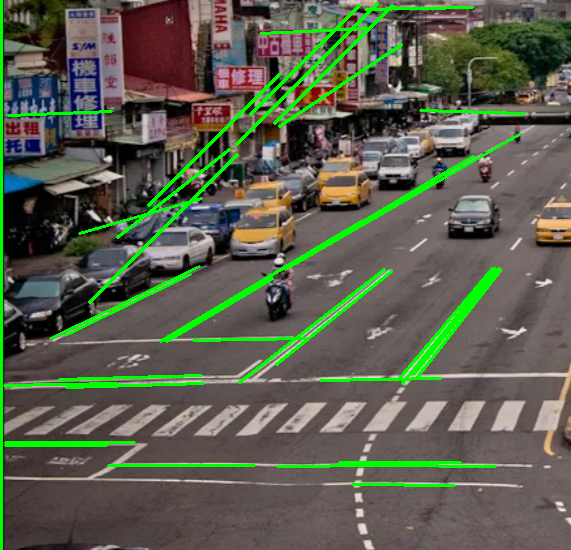

In [15]:
import numpy as np
# 使用 Hough 變換來檢測直線
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
# 在原圖像上畫出檢測到的直線
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2_imshow(image)